In [4]:
import mglearn
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

iris = load_iris()

In [5]:
from sklearn.svm import SVC 
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {}  size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 对每种参数组合训练一个SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 在测试集上评估SVC
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112  size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


In [6]:
# mglearn.plots.plot_cross_val_selection()

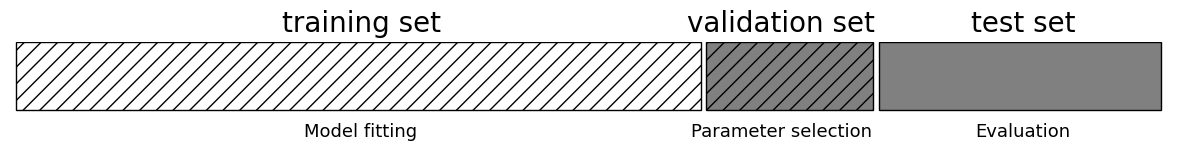

In [7]:
mglearn.plots.plot_threefold_split()

In [8]:
from sklearn.svm import SVC 
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Size of training set: {}  size of validation set: {}  size of test set: {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84  size of validation set: 28  size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [9]:
from sklearn.model_selection import cross_val_score
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.97
Best parameters:  {'C': 10, 'gamma': 0.1}
Test set score with best parameters: 0.97


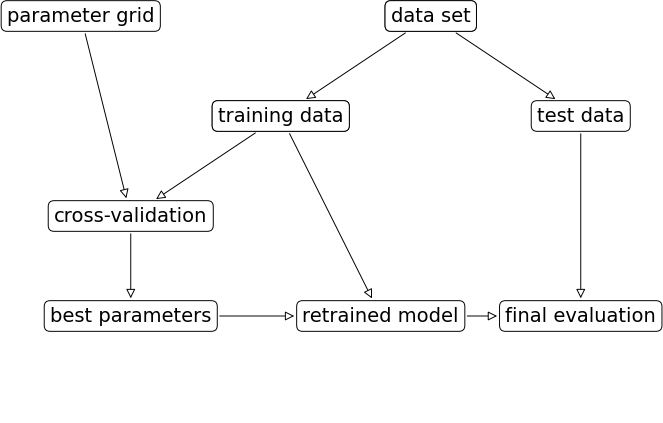

In [10]:
mglearn.plots.plot_grid_search_overview()

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=10)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), param_grid, cv=kfold)

In [12]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [13]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [14]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.99


In [15]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


In [16]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000000,0.000000,0.000997,3.234067e-07,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.352941,0.235294,0.235294,0.235294,0.25,0.261765,0.045943,22
1,0.000000,0.000000,0.000510,4.471846e-04,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.352941,0.235294,0.235294,0.235294,0.25,0.261765,0.045943,22
2,0.000000,0.000000,0.000199,3.987312e-04,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.352941,0.235294,0.235294,0.235294,0.25,0.261765,0.045943,22
3,0.000798,0.000399,0.000000,0.000000e+00,0.001,1,"{'C': 0.001, 'gamma': 1}",0.352941,0.235294,0.235294,0.235294,0.25,0.261765,0.045943,22
4,0.000399,0.000489,0.000598,4.885778e-04,0.001,10,"{'C': 0.001, 'gamma': 10}",0.352941,0.235294,0.235294,0.235294,0.25,0.261765,0.045943,22


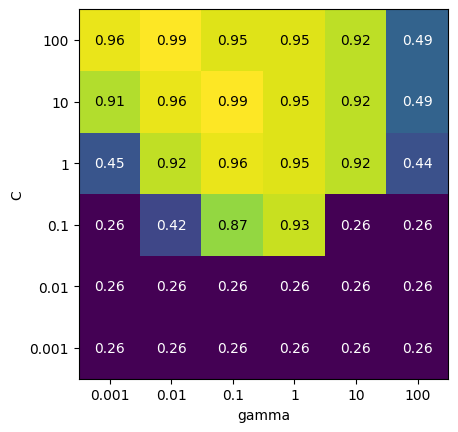

In [17]:
import mglearn
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

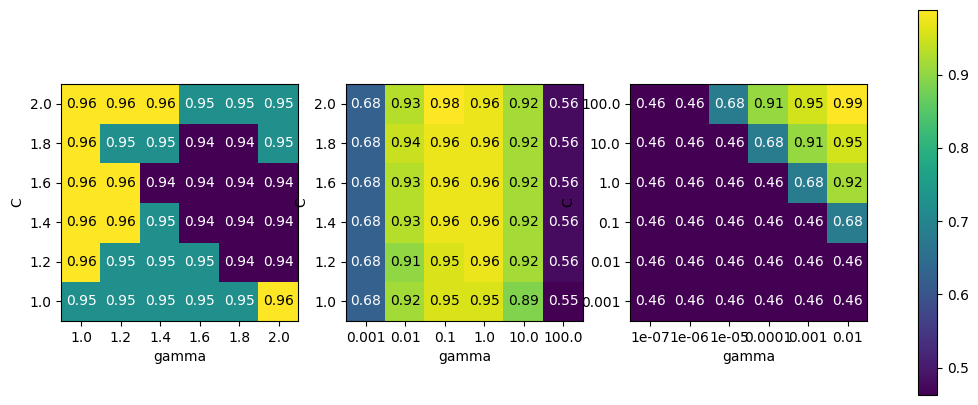

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())
# plt.suptitle("图5-9：错误的搜索网格的热图可视化")

In [19]:
param_grid = [{'kernel' : ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
               {'kernel': ['linear'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(SVC(), param_grid, cv=kfold)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.99


In [20]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.0,0.000399,0.000798,0.0,0.000405,0.000818,0.000406,0.000436,0.000108,0.000399,...,0.000199,0.000399,0.0,0.0,0.000399,0.000399,0.000399,0.000199,0.000399,0.000199
std_fit_time,0.0,0.000489,0.000399,0.0,0.000496,0.000253,0.000203,0.00022,0.000215,0.000489,...,0.000399,0.000489,0.0,0.0,0.000489,0.000489,0.000489,0.000399,0.000489,0.000399
mean_score_time,0.000798,0.0,0.000199,0.000598,0.0,0.000203,0.000209,0.000203,0.000416,0.0,...,0.000399,0.0002,0.000598,0.000598,0.0,0.0002,0.0,0.000399,0.0,0.000399
std_score_time,0.000399,0.0,0.000399,0.000489,0.0,0.000249,0.000256,0.000248,0.000378,0.0,...,0.000489,0.000399,0.000489,0.000489,0.0,0.000399,0.0,0.000489,0.0,0.000489
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,0.352941,...,1.0,1.0,0.941176,0.588235,0.352941,0.941176,0.941176,1.0,1.0,0.941176
split1_test_score,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,0.235294,...,0.941176,0.941176,0.882353,0.411765,0.235294,0.705882,1.0,1.0,1.0,0.941176


In [21]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


In [25]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # 对于外层交叉验证的每次数据划分，split方法返回索引值
    for training_samples, test_samples in outer_cv.split(X, y):
        # 利用内层交叉验证找到最佳参数
        best_parms = {}
        best_score = -np.inf
        # 遍历参数
        for parameters in parameter_grid:
            # 在内层划分中累加分数
            cv_scores = []
            # 遍历内层交叉验证
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                # 对于给定的参数和训练数据来构建分类器
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 在内层测试集上进行评估
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 计算内层交叉验证的平均分数
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # 如果比前面的模型都要好，则保存其参数
                best_score = mean_score
                best_params = parameters
        # 利用外层训练集和最佳参数来构建模型
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 评估模型
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [26]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [28]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

iris = load_iris()

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=0)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)
print(search.best_estimator_)
print(search.best_score_)
# search.best_params_         # {'C': 2.195254015709299, 'penalty': 'l1'}

LogisticRegression(C=2.195254015709299, max_iter=200, penalty='l1',
                   random_state=0, solver='saga', tol=0.01)
0.9800000000000001


In [29]:
import numpy as np
from time import time
from scipy.stats import randint as sp_randint
 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
 
# get some  data
digits = load_digits()
X, y = digits.data , digits.target
 
# build a classifier
clf = RandomForestClassifier(n_estimators=20)
 
# utility function to report best scores
def report(results, n_top= 3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank:{0}".format(i))
            print("Mean validation score : {0:.3f} (std: {1:.3f})".
                  format(results['mean_test_score'][candidate],
                         results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
 
# 指定取样的参数和分布 specify parameters and distributions to sample from
param_dist = {"max_depth":[3,None],
              "max_features":sp_randint(1,11),
              "min_samples_split":sp_randint(2,11),
              "bootstrap":[True, False],
              "criterion":["gini","entropy"]
              }
 
# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf,param_distributions=param_dist,
                                   n_iter=n_iter_search,cv =5)
start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)
 
# use a full grid over all parameters
param_grid = {"max_depth":[3,None],
              "max_features":[1, 3, 10],
              "min_samples_split":[2, 3, 10],
              "bootstrap":[True, False],
              "criterion":["gini","entropy"]
    }
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv =5)
start = time()
grid_search.fit(X , y)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 3.96 seconds for 20 candidates parameter settings.
Model with rank:1
Mean validation score : 0.927 (std: 0.027)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 2}

Model with rank:2
Mean validation score : 0.925 (std: 0.025)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_split': 3}

Model with rank:2
Mean validation score : 0.925 (std: 0.027)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 9}

GridSearchCV took 12.15 seconds for 72 candidate parameter settings.
Model with rank:1
Mean validation score : 0.932 (std: 0.021)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 2}

Model with rank:2
Mean validation score : 0.931 (std: 0.022)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': Non